<h1>Zadanie 5</h1>

<h2>CYFROWE PRZETWARZANIE SYGNAŁÓW I OBRAZÓW <br>
Przetwarzanie i analiza sygnału EKG</h2>
<h3>
Kasper Radom 264023 <br>
Maciej Szymczak 263978</h3>

<h3>1</h3>
Importowanie niezbędnych bibliotek i deklaracja funkcji wczytującej obraz

In [1]:
%matplotlib ipympl
import skimage as ski
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from matplotlib.gridspec import GridSpec
from matplotlib.widgets import SpanSelector

image = ski.io.imread('chest-xray.tif')
def readImage(imageName):
    global image
    image = ski.io.imread(imageName)
    
    
def showImage(image):
    plt.figure()
    ski.io.imshow(image)
    plt.title(dropdown.value[:-4])
    ski.io.show()

Wybór obrazu do wyświetlenia

In [2]:
options = ['aerial_view.tif', 'blurry-moon.tif', 'bonescan.tif', 'cboard_pepper_only.tif', 'cboard_salt_only.tif', 'cboard_salt_pepper.tif', 'characters_test_pattern.tif', 'chest-xray.tif', 'circuitmask.tif', 'einstein-low-contrast.tif', 'hidden-symbols.tif', 'pollen-dark.tif', 'pollen-ligt.tif', 'pollen-lowcontrast.tif', 'pout.tif', 'spectrum.tif', 'text-dipxe-blurred.tif', 'zoneplate.tif']


dropdown = widgets.Dropdown(
    options=options,
    description='Wybierz plik:',
)

output = widgets.interactive_output(readImage, {'imageName': dropdown})
display(dropdown, output)

@interact(imageName = dropdown)
def closeAll(imageName):
    plt.close("all")

Dropdown(description='Wybierz plik:', options=('aerial_view.tif', 'blurry-moon.tif', 'bonescan.tif', 'cboard_p…

Output()

interactive(children=(Dropdown(description='Wybierz plik:', options=('aerial_view.tif', 'blurry-moon.tif', 'bo…

<h3>2</h3>
Wyświetlanie wykresu zmian poziomu szarości.<br>
Wykres wyświetlany jest wzdłóż osi posiomej.<br>
Znajduje się on na obrazie w celu lepszego wrażenia wizualnego przy porównywaniu wykresu z obrazem.<br>
Czerwona linia pokazuje brany pod uwagę fragment obrazu

In [3]:
x = 300

@interact(imageName = dropdown)
def showGreyScale(imageName):
    readImage(imageName)
    line_values = image[x, :]


    plt.figure()
    plt.plot(line_values)
    plt.plot(list(range(len(line_values))), [x] * len(line_values) , lw=0.2, color="red")
    ski.io.imshow(image)
    plt.xlabel('Pozycja na osi pionowej')
    plt.ylabel('Poziom szarości')
    plt.title('Zmiany poziomu szarości wzdłuż wybranej linii poziomej')
    plt.show()


interactive(children=(Dropdown(description='Wybierz plik:', options=('aerial_view.tif', 'blurry-moon.tif', 'bo…

<h3>3</h3>
Wybór prostokątnego obrazu i jego zapis

Text(value='NowyPlik.png', description='Nazwa pliku: ')

Output()

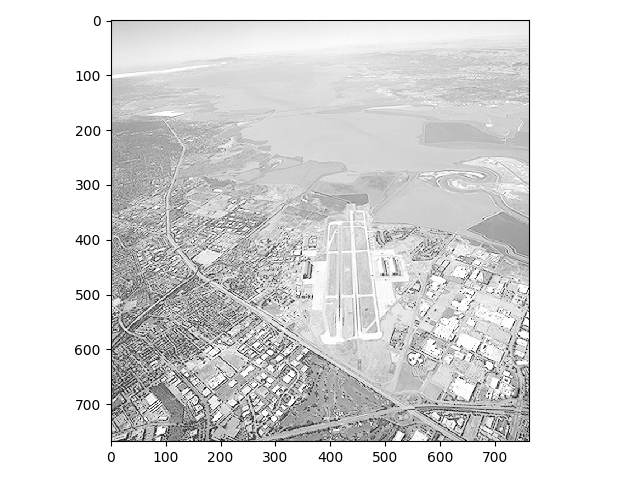

In [4]:
plt.figure()
ski.io.imshow(image)

# Funkcja wywoływana po zmianie tekstu w polu tekstowym
def update_text(value):
    global newFileName
    newFileName = value

# Tworzenie interaktywnego pola tekstowego
text_widget = widgets.Text(value='NowyPlik.png', description='Nazwa pliku: ')
text_output = widgets.interactive_output(update_text, {'value': text_widget})

# Wyświetlenie pola tekstowego i wykresu
display(text_widget, text_output)

In [5]:
plt.savefig(newFileName)